# 1 - Introduction

Nama    : Muhammad Asril Hanif

Batch   : RMT-034

Objective   : 
- Notebook ini bertujuan untuk membuat Supervised Machine Learning untuk memprediksi tingkat sustainability berdasarkan lifestyle seseorang
- Menggunakan 5 model berbeda untuk dibandingkan
- Mencari model terbaik untuk dapat memprediksi dengan tepat
- Melakukan Model Deployment HuggingFace

Variabel Kolom yang akan digunakan pada project ini sebagai berikut :

|Nama Kolom|Deskripsi|
|---|---|
|ParticipantID|ID Partisipan|
|Age|Usia Partisipan|
|Location|Tempat tinggal partisipan (Urban, Suburban, Rural)|
|DietType|Preferensi Diet (Mostly plant-based, Balanced, Mostly animal-based)|
|LocalFoodFrequency|Frekuensi Konsumsi makanan lokal (Often, Sometimes, Rarely)|
|TransportationMode|Alat transportasi utama (Bike, Public Transit, Car, Walk)|
|EnergySource|Sumber energi utama (Renewable, Mixed, Non-renewable)|
|HomeType|Tipe tempat tinggal (Apartment, House)|
|HomeSize|Luas tempat tinggal|
|ClothingFrequency|Frekuensi pembelian pakaian (Often, Sometimes, Rarely)|
|SustainableBrands|Prioritas belanja produk merk berkelanjutan (True, False)|
|EnvironmentalAwareness|Tingkat kesadaran lingkungan (1-5)|
|CommunityInvolvement|Keterlibatan masyarakat (High, Moderate, Low)|
|MonthlyElectricityConsumption|Rata-rata penggunaan listrik|
|MonthlyWaterConsumption|Rata-rata penggunaan air|
|Gender|Jenis kelamin partisipan|
|UsingPlasticProducts|Penggunaan produk berbahan plastik (Often, Sometimes, Rarely)|
|DisposalMethods|Metode utama membuang sampah (Composting, Recycling, Landfill, Combination)|
|PhysicalActivities|Aktifitas fisik (High, Moderate, Low)|
|Rating|Peringkat Sustainibility partisipan (1-5)|

# 2 - Libraries

In [1]:
# Library untuk mengolah data
import pandas as pd
import numpy as np

# Library untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Library untuk pre-processing
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.metrics import f1_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Library untuk algoritma model
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Library untuk save model
import pickle

# 3 - Data Loading

In [2]:
# Load Dataset kedalam variabel df_ori
df_ori = pd.read_csv("lifestyle_sustainability_data.csv")

# Menampilkan isi dataframe
df_ori

,ParticipantID,Age,Location,DietType,LocalFoodFrequency,TransportationMode,EnergySource,HomeType,HomeSize,ClothingFrequency,SustainableBrands,EnvironmentalAwareness,CommunityInvolvement,MonthlyElectricityConsumption,MonthlyWaterConsumption,Gender,UsingPlasticProducts,DisposalMethods,PhysicalActivities,Rating
0,1,35,Urban,Mostly Plant-Based,Often,Bike,Renewable,Apartment,800,Rarely,True,5,High,100,1500,Female,Rarely,Composting,High,5
1,2,28,Suburban,Balanced,Sometimes,Public Transit,Mixed,House,1500,Sometimes,True,4,Moderate,250,3000,Male,Sometimes,Recycling,Moderate,4
2,3,65,Rural,Mostly Animal-Based,Rarely,Car,Non-Renewable,House,2500,Often,False,2,Low,400,4500,Male,Often,Landfill,Low,1
3,4,42,Urban,Mostly Plant-Based,Often,Walk,Renewable,Apartment,950,Sometimes,True,4,Moderate,150,2000,Female,Rarely,Recycling,High,5
4,5,31,Suburban,Balanced,Sometimes,Public Transit,Mixed,House,1800,Often,True,3,Low,300,3500,Non-Binary,Sometimes,Combination,Moderate,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,496,38,Rural,Mostly Plant-Based,Often,Walk,Renewable,House,1789,Sometimes,True,4,High,150,2000,Female,Rarely,Recycling,High,4
495,497,25,Urban,Balanced,Sometimes,Public Transit,Non-Renewable,Apartment,987,Often,False,2,Low,400,4500,Male,Often,Landfill,Low,2
496,498,51,Suburban,Mostly Plant-Based,Always,Bike,Mixed,House,1678,Rarely,True,5,High,280,3200,Non-Binary,Sometimes,Recycling,Moderate,5
497,499,32,Rural,Mostly Plant-Based,Rarely,Walk,Mixed,House,1850,Often,False,1,High,397,4076,Female,Rarely,Recycling,Low,5


Dari tampilan dataframe, terdapat 499 baris data dengan 20 kolom, juga terlihat ada beberapa missing value dikolom `CommunityInvolvement`

In [3]:
# Check Summary Info
df_ori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   ParticipantID                  499 non-null    int64 
 1   Age                            499 non-null    int64 
 2   Location                       499 non-null    object
 3   DietType                       499 non-null    object
 4   LocalFoodFrequency             499 non-null    object
 5   TransportationMode             499 non-null    object
 6   EnergySource                   499 non-null    object
 7   HomeType                       499 non-null    object
 8   HomeSize                       499 non-null    int64 
 9   ClothingFrequency              499 non-null    object
 10  SustainableBrands              499 non-null    bool  
 11  EnvironmentalAwareness         499 non-null    int64 
 12  CommunityInvolvement           381 non-null    object
 13  Month

Dari tampilan summary info, ternyata missing value ada di 2 kolom yaitu `CommunityInvolvement` dan `PhysicalActivities` yang keduanya bertipe data String. Selain itu terlihat tipe data setiap kolom yaitu String ada 12 kolom, Integer 7 kolom, dan Boolean 1 kolom.

In [4]:
# Check Jumlah Missing Value
df_ori.isna().sum()

ParticipantID                      0
Age                                0
Location                           0
DietType                           0
LocalFoodFrequency                 0
TransportationMode                 0
EnergySource                       0
HomeType                           0
HomeSize                           0
ClothingFrequency                  0
SustainableBrands                  0
EnvironmentalAwareness             0
CommunityInvolvement             118
MonthlyElectricityConsumption      0
MonthlyWaterConsumption            0
Gender                             0
UsingPlasticProducts               0
DisposalMethods                    0
PhysicalActivities               108
Rating                             0
dtype: int64

Dari pengecekan jumlah missing value per kolom terlihat kolom `CommunityInvolvement` sebanyak 118 missing value dan `PhysicalActivities` sebanyak 108 missing value. Jumlah tersebut cukup besar dan handling akan dilakukan setelah mencari pola missing valuenya

In [5]:
# Check hubungan kolom yang terdapat missing value dengan kolom yang kemungkinan mempengaruhi isi dari missing value
df_ori[['TransportationMode','HomeType','ClothingFrequency','EnvironmentalAwareness','CommunityInvolvement','DisposalMethods','PhysicalActivities']].sample(5)

,TransportationMode,HomeType,ClothingFrequency,EnvironmentalAwareness,CommunityInvolvement,DisposalMethods,PhysicalActivities
44,Car,Apartment,Always,2,NaN,Landfill,NaN
435,Car,Apartment,Sometimes,1,Moderate,Recycling,NaN
209,Car,Apartment,Always,2,NaN,Landfill,NaN
478,Car,Other,Often,1,Low,Landfill,Low
497,Walk,House,Often,1,High,Recycling,Low


Setelah melakukan pencarian pengaruh kolom lain terhadap missing value, ternyata missing value kedua kolom sangat tidak berhubungan dengan kolom lain. Bisa dipastikan bahwa jenis missing value tersebut yaitu MNAR, kemungkinan terdapat missing value karena input survey bagian tersebut memang tidak diisi oleh partisipan.

Dari perincian diatas maka saya akan handling missing value dengan mengeliminasi/drop kedua kolom tersebut dari feature selection.

In [6]:
# Check duplikat data
df_ori.duplicated().sum()

0

Data tidak ada yang duplikat yang berarti data sudah bersih dan dapat diproses selanjutnya.

# 4 - EDA

## 4.1 - Korelasi feature dengan tipe data integer

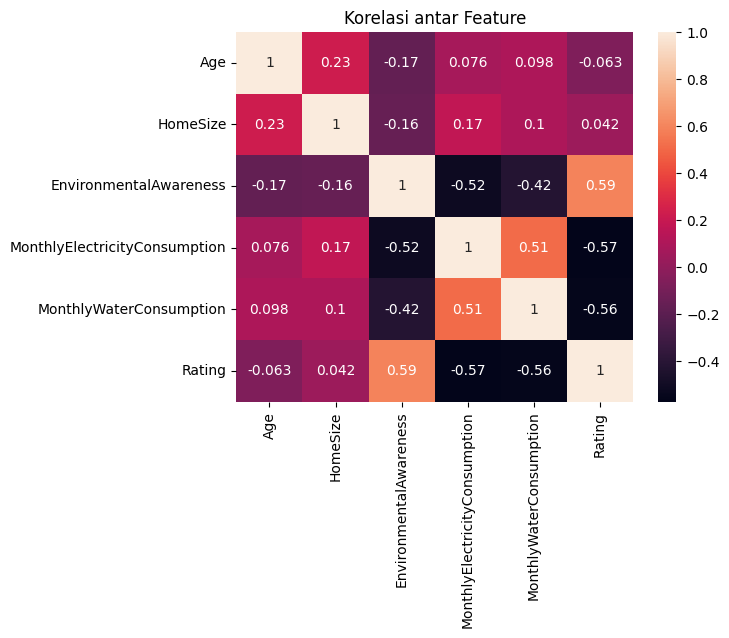

In [7]:
# Visualisasi Korelasi Heatmap
sns.heatmap(df_ori[['Age','HomeSize','EnvironmentalAwareness','MonthlyElectricityConsumption','MonthlyWaterConsumption','Rating']].corr(), annot=True)
plt.title("Korelasi antar Feature");

Dari visualisasi heatmap korelasi feature terhadap `Rating` terdapat 3 kolom yang sangat mempengaruhi `Rating` yaitu :
- `EnvironmentalAwareness` berkorelasi positif dan cukup berpengaruh besar terhadap besarnya `Rating`
- `MonthlyElectricityConsumption` dan `MonthlyWaterConsumption` berkorelasi negatif dan cukup berpengaruh besar, besar kemungkinan karena biaya yang ikut membesar ketika value pada 2 feature ini naik sehingga mengakibatkan partisipan mengurangi `Rating`


## 4.2 - Mencari tipe Feature (Numerikal/Kategorikal)

Pada bagian ini akan dilakukan eksplorasi untuk menentukan apakah feature tersebut termasuk Numerikal atau Kategorikal. Juga akan ditentukan jenis Kategorikalnya Nominal atau Ordinal

In [8]:
# Mencari dengan jumlah unique value
df_ori.nunique()

ParticipantID                    499
Age                               60
Location                           3
DietType                           3
LocalFoodFrequency                 4
TransportationMode                 4
EnergySource                       3
HomeType                           3
HomeSize                         362
ClothingFrequency                  4
SustainableBrands                  2
EnvironmentalAwareness             5
CommunityInvolvement               3
MonthlyElectricityConsumption    224
MonthlyWaterConsumption          295
Gender                             4
UsingPlasticProducts               4
DisposalMethods                    4
PhysicalActivities                 3
Rating                             5
dtype: int64

Dari pencarian jumlah unique value, dapat ditentukan untuk Numerikal pasti memiliki banyak unique value sehingga feature numerikal terdiri dari feature `Age`, `HomeSize`, `MonthlyElectricityConsumption`, dan `MonthlyWaterConsumption`. Sedangkan untuk `ParticipantID` tidak akan termasuk dalam feature karena kolom tersebut adalah kolom index/pengenal partisipan

Selain dari 4 feature tersebut termasuk kedalam Kategorikal. Namun ada 1 feature yang saya tidak setuju karena kategorinya terlalu banyak, yaitu Feature `Gender` yang mana seharusnya hanya ada 2. Oleh karena itu, feature `Gender` tidak akan saya pakai dalam model machine learning saat ini.

In [9]:
# Menentukan kategorikal nominal dan ordinal
for i in df_ori.columns:
    if df_ori[i].nunique() < 6 :
        print(f"Feature {i} : {df_ori[i].unique()}")

Feature Location : ['Urban' 'Suburban' 'Rural']
Feature DietType : ['Mostly Plant-Based' 'Balanced' 'Mostly Animal-Based']
Feature LocalFoodFrequency : ['Often' 'Sometimes' 'Rarely' 'Always']
Feature TransportationMode : ['Bike' 'Public Transit' 'Car' 'Walk']
Feature EnergySource : ['Renewable' 'Mixed' 'Non-Renewable']
Feature HomeType : ['Apartment' 'House' 'Other']
Feature ClothingFrequency : ['Rarely' 'Sometimes' 'Often' 'Always']
Feature SustainableBrands : [ True False]
Feature EnvironmentalAwareness : [5 4 2 3 1]
Feature CommunityInvolvement : ['High' 'Moderate' 'Low' nan]
Feature Gender : ['Female' 'Male' 'Non-Binary' 'Prefer not to say']
Feature UsingPlasticProducts : ['Rarely' 'Sometimes' 'Often' 'Never']
Feature DisposalMethods : ['Composting' 'Recycling' 'Landfill' 'Combination']
Feature PhysicalActivities : ['High' 'Moderate' 'Low' nan]
Feature Rating : [5 4 1 3 2]


Feature yang termasuk kategori ordinal yaitu `LocalFoodFrequency`, `ClothingFrequency`, dan `UsingPlasticProducts` dengan urutan Rarely, Sometimes, Often, Always. Ada juga `EnvironmentalAwareness` dengan urutan 1, 2, 3, 4, 5.

untuk `Rating` akan menjadi Target. Selain dari feature diatas maka akan dimasukkan kedalam kategori nominal

## 4.3 - Perbandingan tempat tinggal yang memiliki rating lebih dari 4 berdasarkan Lokasi tempat tinggal

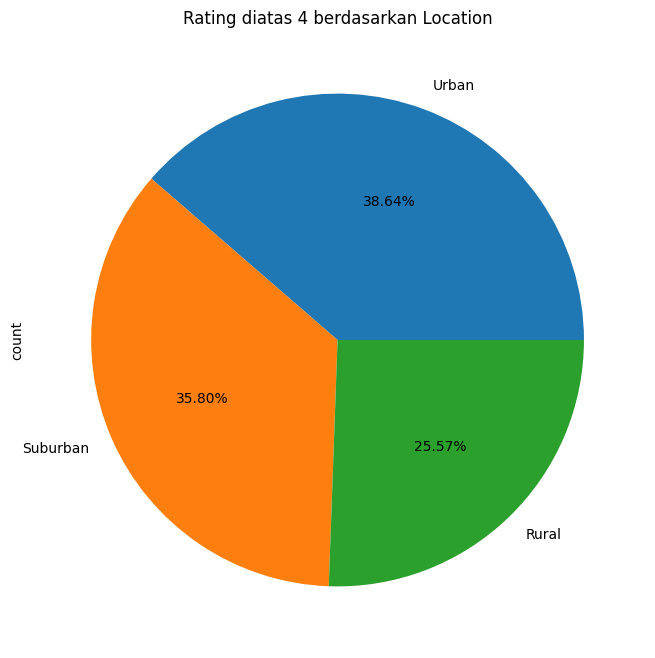

In [10]:
# Mencari perbandingan 'Rating' lebih dari 4 di berbagai 'Location'
HighRating = df_ori[(df_ori['Rating'] > 4)]['Location'].value_counts()

# Memvisualisasikan hasil pencarian
fig, ax1 = plt.subplots(figsize = (8,8))
HighRating.plot(kind='pie', autopct='%.2f%%', ax = ax1)
plt.title("Rating diatas 4 berdasarkan Location")
plt.show()

Dari visualisasi diatas, terlihat lokasi dengan rating diatas 4 terbagi cukup seimbang antara Urban dan Suburban.

Partisipan ternyata cenderung cukup puas dengan kehidupan di Urban, dan Suburban dibandingkan dengan yang berada di Rural area, hal ini kemungkinan karena mudahnya akses ke berbagai fasilitas modern dan terjaminnya kehidupan kedepannya.

## 4.4 - Eksplorasi Target

In [11]:
# Check jumlah data tiap class
df_ori['Rating'].value_counts()

Rating
5    176
3    101
1     97
4     91
2     34
Name: count, dtype: int64

Target pada model machine learning yang saya buat ini yaitu `Rating` seberapa sustain lingkungan tersebut untuk ditinggali. Pada eksplorasi jumlah data tiap tingkatan `Rating` terlihat datanya tidak seimbang sehingga akan membuat model machine learning kurang akurat.

Oleh karena itu, saya akan menyederhanakan `Rating` tersebut dengan cara menggolongkannya menjadi 3 golongan yaitu `Poor`, `Good`, dan `Very Good` dengan rincian :
- `Poor` terdiri dari `Rating` 1-3
- `Good` terdiri dari `Rating` 4
- `Very Good` terdiri dari `Rating` 5

# 5 - Feature Engineering

## 5.1 - Feature Selection

In [12]:
# Feature yang akan digunakan disimpan pada variabel X dan target akan disimpan divariabel y
# Pemilihan feature berdasarkan hasil eksplorasi di Data Loading dan khususnya EDA

X = df_ori[['Age','HomeSize','MonthlyElectricityConsumption','MonthlyWaterConsumption', 'Location', 'DietType', 'TransportationMode', 'EnergySource', 'HomeType', 'SustainableBrands', 'DisposalMethods', 'LocalFoodFrequency', 'ClothingFrequency', 'UsingPlasticProducts', 'EnvironmentalAwareness']]
y = df_ori['Rating']

display(X.shape)
display(y.shape)

(499, 15)

(499,)

Proses seleksi feature dan target berhasil. Feature memiliki 15 kolom

In [13]:
# Mengubah value sesuai kelompok dari EDA yang telah dilakukan
y = y.replace([1,2,3,4,5],['Poor','Poor','Poor','Good','Very Good'])
y.value_counts()

Rating
Poor         232
Very Good    176
Good          91
Name: count, dtype: int64

Pengelompokkan Target sesuai dengan EDA yang telah dilakukan

## 5.2 - Split Train and Test Set

In [14]:
# Split Train and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

# Menampilkan perbandingan Train dan Test set
print(f"Jumlah Train set : {X_train.shape[0]}")
print(f"Jumlah Test set : {X_test.shape[0]}")

Jumlah Train set : 349
Jumlah Test set : 150


Proses split train dan test set berhasil dilakukan dengan perbandingan 70:30, rasio pembagian train dan test set tersebut dipilih agar jumlah data test-set tidak terlalu sedikit yang mengakibatkan nilai metrics yang kurang bagus dan sulit untuk menentukan model terbaiknya

In [15]:
# Check jumlah class pada test-set
y_test.value_counts()

Rating
Poor         78
Very Good    50
Good         22
Name: count, dtype: int64

Jumlah class pada test-set cukup bagus setelah dikelompokkan

## 5.3 - Outlier Handling

In [16]:
# Membuat fungsi untuk mencari upper dan lower boundaries pada distribusi skewed (Tukey's Rule)
def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

# Membuat fungsi untuk mencari upper dan lower boundaries pada distribusi normal (Z-Score)
def find_boundaries(df, variable):
    avg = df[variable].mean()
    std = df[variable].std()

    upper_boundary = avg + 3*std
    lower_boundary = avg - 3*std

    return upper_boundary, lower_boundary

Fungsi untuk mencari upper dan lower boundary

In [17]:
# Looping untuk mengetahui skewness tiap feature
FeatureNumerik = ['Age','HomeSize','MonthlyElectricityConsumption', 'MonthlyWaterConsumption']
for i in FeatureNumerik:
    print(f"Skewness X_Train feature {i} : {X_train[i].skew()}")
    print("")

Skewness X_Train feature Age : 0.17178318206861556

Skewness X_Train feature HomeSize : 0.3492328295115148

Skewness X_Train feature MonthlyElectricityConsumption : -0.11049183002531697

Skewness X_Train feature MonthlyWaterConsumption : -0.2430705738998859



Dari pencarian skewness feature numerik, persebaran data ternyata normal. Selanjutnya akan dilakukan pencarian nilai batas atas dan bawahnya menggunakan Z-Score

Upper Boundary :  87.37232231504746
Lower Boundary :  -0.1746145786577742
Persentase Extreme Value : 0.0
Outlier :  0 baris data


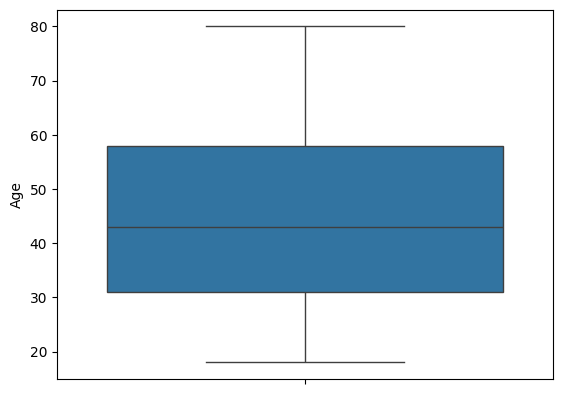

In [18]:
# Mencari outlier feature 'Age'
up_bound, low_bound = find_boundaries(X_train,'Age')
print("Upper Boundary : ",up_bound)
print("Lower Boundary : ",low_bound)
print("Persentase Extreme Value :", len(X_train[X_train['Age'] > up_bound])/len(X_train) * 100)
print("Outlier : ", len(X_train[X_train['Age'] > up_bound]),'baris data')

sns.boxplot(data=X_train['Age']);

Feature `Age` hanya memiliki 1 outlier, sangat pasti 1 data tersebut adalah maximum value dari feature `Age` karena tidak mungkin partisipan berusia kurang dari 0

In [19]:
# Check max value dari feature 'Age'
X_train['Age'].max()

80

Partisipan berumur 96 sangat normal, hal ini berarti tidak akan ada handling outlier untuk feature `Age`

Upper Boundary :  3558.013399384414
Lower Boundary :  -447.4861787540415
Persentase Extreme Value : 0.0
Outlier :  0 baris data


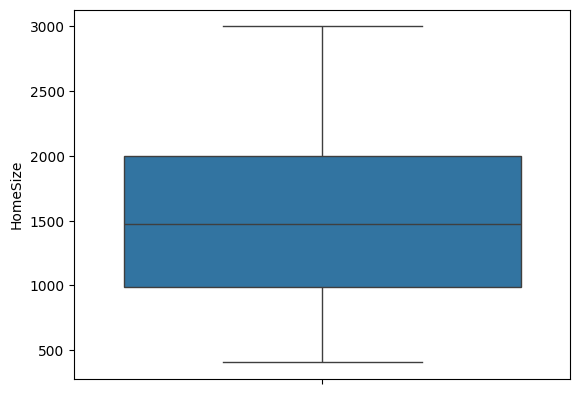

In [20]:
# Mencari outlier feature 'HomeSize'
up_bound, low_bound = find_boundaries(X_train,'HomeSize')
print("Upper Boundary : ",up_bound)
print("Lower Boundary : ",low_bound)
print("Persentase Extreme Value :", len(X_train[X_train['HomeSize'] > up_bound])/len(X_train) * 100)
print("Outlier : ", len(X_train[X_train['HomeSize'] > up_bound]),'baris data')

sns.boxplot(data=X_train['HomeSize']);

Feature `HomeSize` tidak memiliki Outlier sehingga tidak akan dilakukan handling

Upper Boundary :  644.0178889470702
Lower Boundary :  -68.52218694133956
Persentase Extreme Value : 0.0
Outlier :  0 baris data


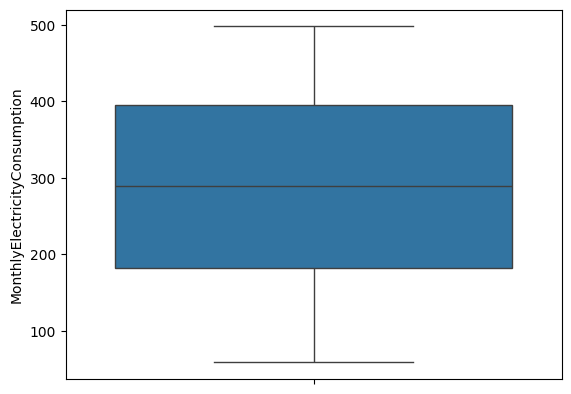

In [21]:
# Mencari outlier feature 'MonthlyElectricityConsumption'
up_bound, low_bound = find_boundaries(X_train,'MonthlyElectricityConsumption')
print("Upper Boundary : ",up_bound)
print("Lower Boundary : ",low_bound)
print("Persentase Extreme Value :", len(X_train[X_train['MonthlyElectricityConsumption'] > up_bound])/len(X_train) * 100)
print("Outlier : ", len(X_train[X_train['MonthlyElectricityConsumption'] > up_bound]),'baris data')

sns.boxplot(data=X_train['MonthlyElectricityConsumption']);

Feature `MonthlyElectricityConsumption` tidak memiliki outlier sehingga tidak akan dilakukan handling

Upper Boundary :  6712.887864513371
Lower Boundary :  -467.56981293743956
Persentase Extreme Value : 0.0
Outlier :  0 baris data


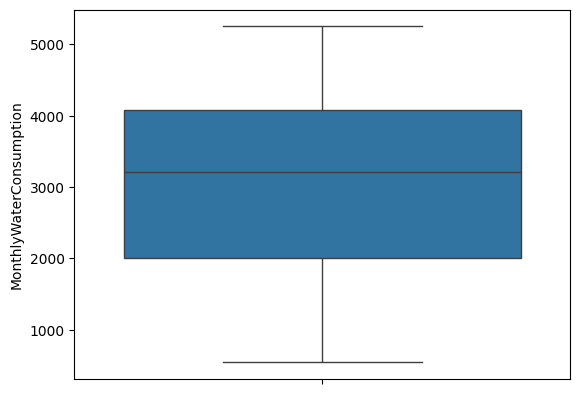

In [22]:
# Mencari outlier feature 'MonthlyWaterConsumption'
up_bound, low_bound = find_boundaries(X_train,'MonthlyWaterConsumption')
print("Upper Boundary : ",up_bound)
print("Lower Boundary : ",low_bound)
print("Persentase Extreme Value :", len(X_train[X_train['MonthlyWaterConsumption'] > up_bound])/len(X_train) * 100)
print("Outlier : ", len(X_train[X_train['MonthlyWaterConsumption'] > up_bound]),'baris data')

sns.boxplot(data=X_train['MonthlyWaterConsumption']);

Feature `MonthlyWaterConsumption` juga tidak memiliki outlier.

Oleh karena itu, handling outlier pada dataset ini tidak akan dilakukan

## 5.4 - Split Numerical and Categorical

In [23]:
# Memisahkan feature Numerikal
num_col = [ 'Age','HomeSize','MonthlyElectricityConsumption', 'MonthlyWaterConsumption']

# Memisahkan feature Kategorikal Nominal
cat_nom_col = ['Location', 'DietType', 'TransportationMode', 'EnergySource', 'HomeType', 'SustainableBrands', 'DisposalMethods']

# Memisahkan feature Kategorikal Ordinal
cat_ord_col = ['LocalFoodFrequency', 'ClothingFrequency', 'UsingPlasticProducts', 'EnvironmentalAwareness']


Proses split selesai, selanjutnya akan dilakukan scaling dan encoding.

## 5.5 - Pipeline Scaling & Encoding

In [24]:
# Membuat Pipeline Scaling
pipe_num = Pipeline([
    ('scaler', StandardScaler())
])

# Membuat Pipeline Encoding Nominal
pipe_cat_nom = Pipeline([
    ('encoder_nom', OneHotEncoder())
])

# Membuat Pipeline Encoding Ordinal
pipe_cat_ord = Pipeline([
    ('encoder_ord', OrdinalEncoder(categories=[
        ['Rarely','Sometimes','Often','Always'],
        ['Rarely','Sometimes','Often','Always'],
        ['Never','Rarely','Sometimes','Often'],
        [1, 2, 3, 4, 5]
    ]))
])

# Membuat Pipeline preprocess
preprocess_pipeline = ColumnTransformer(transformers=[
    ('pipe_num', pipe_num, num_col),
    ('pipe_cat_nom', pipe_cat_nom, cat_nom_col),
    ('pipe_cat_ord', pipe_cat_ord, cat_ord_col)
])

Proses pembuatan Pipeline Scaling dan Encoding selesai dilakukan, Scaling menggunakan StandardScaler karena data pada numerik kolom memiliki persebaran distribusi yang normal.

Saya akan memakai beberapa model untuk mendapat hasil yang baik pada saat melakukan proses Ensemble

## 5.6 - Data Balancing

In [25]:
# Memeriksa keseimbangan data
y_train.value_counts()

Rating
Poor         154
Very Good    126
Good          69
Name: count, dtype: int64

Dari perhitungan data, terlihat data tidak seimbang. Oleh karena itu, saya akan mencoba melakukan data balancing dan membandingkan hasilnya dengan model yang tidak menggunakan data balancing

In [26]:
# Proses Scaling untuk data balancing
X_train_scaled = preprocess_pipeline.fit_transform(X_train)

X_test_scaled = preprocess_pipeline.transform(X_test)

Proses Scaling dan Encoding dilakukan sebagai syarat melakukan data balancing

In [27]:
# Oversampling with SMOTE

smote = SMOTE(sampling_strategy='not majority', k_neighbors=5, random_state=42)     # Minority Class will have same the same number as the majority class
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)
y_train_balanced.value_counts()

Rating
Good         154
Very Good    154
Poor         154
Name: count, dtype: int64

Setelah proses Balancing, data sudah seimbang dan siap diproses

Proses Balancing Data dilakukan untuk mempermudah dalam memilih model terbaik saat training

# 6 - Model Definition

## 6.1 - SVC (Classification) Model

In [28]:
# Membuat Pipeline Model SVC
pipe_SVC = Pipeline([
    ('Preprocessor', preprocess_pipeline),
    ('Classifier', SVC(decision_function_shape='ovo', random_state=21))
])

Pipeline Model Definition menggunakan SVC dengan parameter default

In [29]:
# Membuat Pipeline Model SVC untuk train Balanced Data
pipe_SVC_b = Pipeline([
    ('Classifier', SVC(decision_function_shape='ovo', random_state=21))
])

Pipeline Model Definition SVC untuk Balanced Data

## 6.2 - AdaBoostClassifier

In [30]:
# Membuat Pipeline Model SVR
pipe_ABC = Pipeline([
    ('Preprocessor', preprocess_pipeline),
    ('Classifier', AdaBoostClassifier(estimator=SVC(probability=True), n_estimators=50, random_state=21))
])

Pipeline Model Definition menggunakan AdaBoostClassifier dengan parameter default

## 6.3 - KNN Model

In [31]:
# Membuat Pipeline Model KNN
pipe_KNN = Pipeline([
    ('Preprocessor', preprocess_pipeline),
    ('Classifier', KNeighborsClassifier())
])

Pipeline Model Definition KNN dengan parameter default

In [32]:
# Membuat Pipeline Model KNN untuk train Balanced Data
pipe_KNN_b = Pipeline([
    ('Classifier',KNeighborsClassifier())
])

Pipeline Model Definition KNN untuk Balanced Data

## 6.4 - DecisionTree Classifier

In [33]:
# Membuat Pipeline Model DecisionTree
pipe_DT = Pipeline([
    ('Preprocessor',preprocess_pipeline),
    ('Classifier', DecisionTreeClassifier(random_state=21))
])

Pipeline Model Definition DecisionTree Classifier dengan parameter default

In [34]:
# Membuat Pipeline Model KNN untuk train Balanced Data
pipe_DT_b = Pipeline([
    ('Classifier', DecisionTreeClassifier(random_state=21))
])

Pipeline Model Definition DecisionTreeClassifier untuk Balanced Data

## 6.5 - RandomForest Classifier

In [35]:
# Membuat Pipeline Model RandomForrest
pipe_RF = Pipeline([
    ('Preprocessor', preprocess_pipeline),
    ('Classifier', RandomForestClassifier(random_state=21) )
])

Pipeline Model Definition RandomForest Classifier dengan parameter default

In [36]:
# Membuat Pipeline Model RandomForest untuk Balanced Data
pipe_RF_b = Pipeline([
    ('Classifier', RandomForestClassifier(random_state=21) )
])

Pipeline Model Definition RandomForest untuk Balanced Data

# 7 - Model Training

## 7.1 - SVC (Classification) Model

In [37]:
# Proses Model Training
ModelSVC = pipe_SVC.fit(X_train, y_train)
ModelSVC

Pipeline(steps=[('Preprocessor',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'HomeSize',
                                                   'MonthlyElectricityConsumption',
                                                   'MonthlyWaterConsumption']),
                                                 ('pipe_cat_nom',
                                                  Pipeline(steps=[('encoder_nom',
                                                                   OneHotEncoder())]),
                                                  ['Location', 'DietType',
                                                   'TransportationMode',
                                                   'EnergySource', 'HomeType',
                                                   'SustainableBr...
                                                  Pipeline(steps=[('encoder_ord',
                                                                   OrdinalEncoder(categories=[['Rarely',
                                                                                               'Sometimes',
                                                                                               'Often',
                                                                                               'Always'],
                                                                                              ['Rarely',
                                                                                               'Sometimes',
                                                                                               'Often',
                                                                                               'Always'],
                                                                                              ['Never',
                                                                                               'Rarely',
                                                                                               'Sometimes',
                                                                                               'Often'],
                                                                                              [1,
                                                                                               2,
                                                                                               3,
                                                                                               4,
                                                                                               5]]))]),
                                                  ['LocalFoodFrequency',
                                                   'ClothingFrequency',
                                                   'UsingPlasticProducts',
                                                   'EnvironmentalAwareness'])])),
                ('Classifier',
                 SVC(decision_function_shape='ovo', random_state=21))])

Proses Model Training selesai. Selanjutnya akan dilakukan Evaluasi

In [38]:
# Proses Model Training
ModelSVC_b = pipe_SVC_b.fit(X_train_balanced, y_train_balanced)
ModelSVC_b

Pipeline(steps=[('Classifier',
                 SVC(decision_function_shape='ovo', random_state=21))])

Proses model training untuk balanced data berhasil dilakukan

## 7.2 - AdaBoostClassifier

In [39]:
# Proses Model Training
ModelABC = pipe_ABC.fit(X_train, y_train)
ModelABC

C:\Users\Asril\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Pipeline(steps=[('Preprocessor',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'HomeSize',
                                                   'MonthlyElectricityConsumption',
                                                   'MonthlyWaterConsumption']),
                                                 ('pipe_cat_nom',
                                                  Pipeline(steps=[('encoder_nom',
                                                                   OneHotEncoder())]),
                                                  ['Location', 'DietType',
                                                   'TransportationMode',
                                                   'EnergySource', 'HomeType',
                                                   'SustainableBr...
                                                  Pipeline(steps=[('encoder_ord',
                                                                   OrdinalEncoder(categories=[['Rarely',
                                                                                               'Sometimes',
                                                                                               'Often',
                                                                                               'Always'],
                                                                                              ['Rarely',
                                                                                               'Sometimes',
                                                                                               'Often',
                                                                                               'Always'],
                                                                                              ['Never',
                                                                                               'Rarely',
                                                                                               'Sometimes',
                                                                                               'Often'],
                                                                                              [1,
                                                                                               2,
                                                                                               3,
                                                                                               4,
                                                                                               5]]))]),
                                                  ['LocalFoodFrequency',
                                                   'ClothingFrequency',
                                                   'UsingPlasticProducts',
                                                   'EnvironmentalAwareness'])])),
                ('Classifier',
                 AdaBoostClassifier(estimator=SVC(probability=True),
                                    random_state=21))])

Training model AdaBoostClassifier berhasil dilakukan

## 7.3 - KNN Model


In [40]:
# Proses Model Training
ModelKNN = pipe_KNN.fit(X_train, y_train)
ModelKNN

Pipeline(steps=[('Preprocessor',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'HomeSize',
                                                   'MonthlyElectricityConsumption',
                                                   'MonthlyWaterConsumption']),
                                                 ('pipe_cat_nom',
                                                  Pipeline(steps=[('encoder_nom',
                                                                   OneHotEncoder())]),
                                                  ['Location', 'DietType',
                                                   'TransportationMode',
                                                   'EnergySource', 'HomeType',
                                                   'SustainableBr...
                                                   'DisposalMethods']),
                                                 ('pipe_cat_ord',
                                                  Pipeline(steps=[('encoder_ord',
                                                                   OrdinalEncoder(categories=[['Rarely',
                                                                                               'Sometimes',
                                                                                               'Often',
                                                                                               'Always'],
                                                                                              ['Rarely',
                                                                                               'Sometimes',
                                                                                               'Often',
                                                                                               'Always'],
                                                                                              ['Never',
                                                                                               'Rarely',
                                                                                               'Sometimes',
                                                                                               'Often'],
                                                                                              [1,
                                                                                               2,
                                                                                               3,
                                                                                               4,
                                                                                               5]]))]),
                                                  ['LocalFoodFrequency',
                                                   'ClothingFrequency',
                                                   'UsingPlasticProducts',
                                                   'EnvironmentalAwareness'])])),
                ('Classifier', KNeighborsClassifier())])

Proses model training KNN berhasil dilakukan

In [41]:
# Proses Model Training
ModelKNN_b = pipe_KNN_b.fit(X_train_balanced, y_train_balanced)
ModelKNN_b

Pipeline(steps=[('Classifier', KNeighborsClassifier())])

Proses model training KNN untuk balanced data berhasil dilakukan

## 7.4 - DecisionTree Classifier

In [42]:
# Proses Model Training
ModelDT = pipe_DT.fit(X_train, y_train)
ModelDT

Pipeline(steps=[('Preprocessor',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'HomeSize',
                                                   'MonthlyElectricityConsumption',
                                                   'MonthlyWaterConsumption']),
                                                 ('pipe_cat_nom',
                                                  Pipeline(steps=[('encoder_nom',
                                                                   OneHotEncoder())]),
                                                  ['Location', 'DietType',
                                                   'TransportationMode',
                                                   'EnergySource', 'HomeType',
                                                   'SustainableBr...
                                                 ('pipe_cat_ord',
                                                  Pipeline(steps=[('encoder_ord',
                                                                   OrdinalEncoder(categories=[['Rarely',
                                                                                               'Sometimes',
                                                                                               'Often',
                                                                                               'Always'],
                                                                                              ['Rarely',
                                                                                               'Sometimes',
                                                                                               'Often',
                                                                                               'Always'],
                                                                                              ['Never',
                                                                                               'Rarely',
                                                                                               'Sometimes',
                                                                                               'Often'],
                                                                                              [1,
                                                                                               2,
                                                                                               3,
                                                                                               4,
                                                                                               5]]))]),
                                                  ['LocalFoodFrequency',
                                                   'ClothingFrequency',
                                                   'UsingPlasticProducts',
                                                   'EnvironmentalAwareness'])])),
                ('Classifier', DecisionTreeClassifier(random_state=21))])

Proses model training DecisionTree berhasil dilakukan

In [43]:
# Proses Model Training
ModelDT_b = pipe_DT_b.fit(X_train_balanced, y_train_balanced)
ModelDT_b

Pipeline(steps=[('Classifier', DecisionTreeClassifier(random_state=21))])

Model Training untuk balanced data

## 7.5 - RandomForest Classifier

In [44]:
# Proses Model Training
ModelRF = pipe_RF.fit(X_train, y_train)
ModelRF

Pipeline(steps=[('Preprocessor',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'HomeSize',
                                                   'MonthlyElectricityConsumption',
                                                   'MonthlyWaterConsumption']),
                                                 ('pipe_cat_nom',
                                                  Pipeline(steps=[('encoder_nom',
                                                                   OneHotEncoder())]),
                                                  ['Location', 'DietType',
                                                   'TransportationMode',
                                                   'EnergySource', 'HomeType',
                                                   'SustainableBr...
                                                 ('pipe_cat_ord',
                                                  Pipeline(steps=[('encoder_ord',
                                                                   OrdinalEncoder(categories=[['Rarely',
                                                                                               'Sometimes',
                                                                                               'Often',
                                                                                               'Always'],
                                                                                              ['Rarely',
                                                                                               'Sometimes',
                                                                                               'Often',
                                                                                               'Always'],
                                                                                              ['Never',
                                                                                               'Rarely',
                                                                                               'Sometimes',
                                                                                               'Often'],
                                                                                              [1,
                                                                                               2,
                                                                                               3,
                                                                                               4,
                                                                                               5]]))]),
                                                  ['LocalFoodFrequency',
                                                   'ClothingFrequency',
                                                   'UsingPlasticProducts',
                                                   'EnvironmentalAwareness'])])),
                ('Classifier', RandomForestClassifier(random_state=21))])

Proses model training RandomForest berhasil dilakukan

In [45]:
# Proses Model Training
ModelRF_b = pipe_RF_b.fit(X_train_balanced, y_train_balanced)
ModelRF_b

Pipeline(steps=[('Classifier', RandomForestClassifier(random_state=21))])

Proses model training RandomForest untuk balanced data berhasil dilakukan

# 8 - Model Evaluation

In [46]:
# Membuat Fungsi Cross Validation
def f1_cross_val(Model,X,y):
    f1_train_cross_val = cross_val_score(Model,
                                        X,
                                        y,
                                        cv=10,
                                        scoring="f1_weighted")

    print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
    print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
    print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
    print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

# Membuat fungsi Check Accuracy Model
def check_accuracy(y_train, y_test, y_train_pred, y_test_pred):
    print(f"f1_score Train-set : {f1_score(y_train, y_train_pred, average='weighted')}")
    print(f"f1_score Test-set : {f1_score(y_test, y_test_pred, average='weighted')}")

# Membuat fungsi visualisasi Confusion Matrix
def viz_cm(y_test, y_test_pred):
    cm_test = confusion_matrix(y_test, y_test_pred)
    ConfusionMatrixDisplay(cm_test).plot();

Pembuatan fungsi untuk mengevaluasi hasil prediksi setiap modelnya

## 8.1 - SVC (Classification) Model

### Imbalance Data

In [47]:
# Membuat variabel prediksi
y_train_pred = ModelSVC.predict(X_train)
y_test_pred = ModelSVC.predict(X_test)

Predict X_train dan X_test dengan Model SVC berhasil dilakukan

In [48]:
# Check akurasi menggunakan Metrics f1_score
check_accuracy(y_train, y_test, y_train_pred, y_test_pred)

f1_score Train-set : 0.8081560687024981
f1_score Test-set : 0.7514516880968494


Evaluasi menggunakan f1_score didapat angka Train-set 0.80 dan Test-set 0.75, dari hasil prediksi terlihat cukup bagus

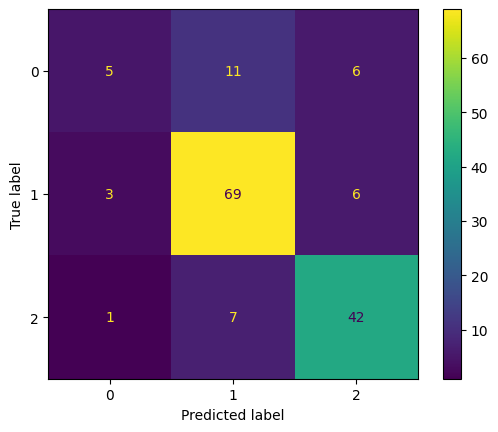

In [49]:
# Visualisasi Confusion Matrix
viz_cm(y_test, y_test_pred)

Visualisasi confusion matrix pada model SVC terlihat True Positive yang cukup banyak

In [50]:
# Check Cross Validation score
f1_cross_val(ModelSVC, X_train, y_train)

F1 Score - All - Cross Validation  :  [0.82315076 0.62386073 0.66893424 0.70528139 0.67443213 0.76170175
 0.66997133 0.72162263 0.64220779 0.78966578]
F1 Score - Mean - Cross Validation :  0.7080828521581762
F1 Score - Std - Cross Validation  :  0.062058778327596445
F1 Score - Range of Test-Set       :  0.6460240738305798 - 0.7701416304857727


Dalam penghitungan score cross validation didapat rata-rata nilai cross validation sebesar 0.70, nilai ini masih terbilang rendah yang bisa mengakibatkan error dalam prediksi

### Balanced Data

In [51]:
# Membuat variabel prediksi
y_train_pred = ModelSVC_b.predict(X_train_balanced)
y_test_pred = ModelSVC_b.predict(X_test_scaled)

Proses predict menggunakan data yang sudah diproses balancing

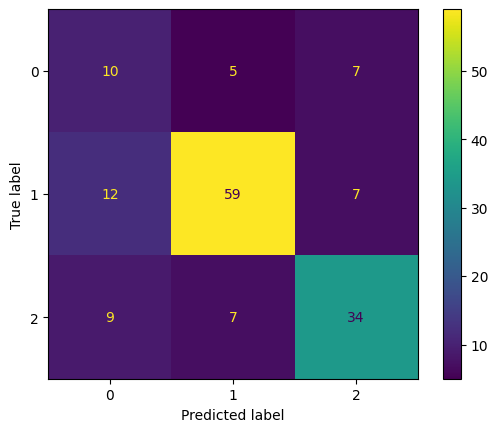

In [52]:
# Memvisualisasikan Confusion Matrix hasil prediksi model
viz_cm(y_test, y_test_pred)

Dari Visualisasi terlihat nilai True Positive lebih bagus daripada imbalanced data, namun masih perlu ditingkatkan lagi

In [53]:
# Check akurasi model
check_accuracy(y_train_balanced, y_test, y_train_pred, y_test_pred)

f1_score Train-set : 0.8766255952030502
f1_score Test-set : 0.6984505094934009


Hasil pemeriksaan f1_score didapat train dan test set nya kurang memuaskan untuk model yang menggunakan data yang balance

In [54]:
# Check cross validation score
f1_cross_val(ModelSVC_b, X_train_scaled, y_train)

F1 Score - All - Cross Validation  :  [0.82315076 0.62386073 0.66893424 0.73352041 0.67443213 0.76170175
 0.66997133 0.72162263 0.64220779 0.78966578]
F1 Score - Mean - Cross Validation :  0.7109067544463643
F1 Score - Std - Cross Validation  :  0.06250791667673425
F1 Score - Range of Test-Set       :  0.64839883776963 - 0.7734146711230986


Namun pada nilai Cross Validationnya terlihat sedikit lebih bagus, hal ini karena data yang telah diproses Balancing Oversampling mendapat peningkatan dalam jumlah data training

### 8.1.1 - Hyperparameter Tuning

In [55]:
grid_search_params = {
    'Classifier__C':[0.01,0.05,0.1,1,5,10],
    'Classifier__kernel':['rbf','poly','linear'],
    'Classifier__gamma':[0.01,0.1,'scale',0.5],
    'Classifier__decision_function_shape':['ovo']
}

Parameter yang akan digunakan untuk Tuning model

#### Imbalance Data

In [56]:
# Tuning SVC dengan data seadanya
TunedSVC = GridSearchCV(pipe_SVC, param_grid=grid_search_params, cv = 3)
TunedSVC.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('Preprocessor',
                                        ColumnTransformer(transformers=[('pipe_num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'HomeSize',
                                                                          'MonthlyElectricityConsumption',
                                                                          'MonthlyWaterConsumption']),
                                                                        ('pipe_cat_nom',
                                                                         Pipeline(steps=[('encoder_nom',
                                                                                          OneHotEncoder())]),
                                                                         ['Location',
                                                                          'DietType',
                                                                          'TransportationMode',
                                                                          'EnergySourc...
                                                                                                                      5]]))]),
                                                                         ['LocalFoodFrequency',
                                                                          'ClothingFrequency',
                                                                          'UsingPlasticProducts',
                                                                          'EnvironmentalAwareness'])])),
                                       ('Classifier',
                                        SVC(decision_function_shape='ovo',
                                            random_state=21))]),
             param_grid={'Classifier__C': [0.01, 0.05, 0.1, 1, 5, 10],
                         'Classifier__decision_function_shape': ['ovo'],
                         'Classifier__gamma': [0.01, 0.1, 'scale', 0.5],
                         'Classifier__kernel': ['rbf', 'poly', 'linear']})

In [57]:
# Menampilkan best parameter
print("Best Parameter :", TunedSVC.best_params_)
print('Best cross-validation accuracy : {:.2f}'.format(TunedSVC.best_score_))

Best Parameter : {'Classifier__C': 1, 'Classifier__decision_function_shape': 'ovo', 'Classifier__gamma': 0.01, 'Classifier__kernel': 'rbf'}
Best cross-validation accuracy : 0.74


Best Parameter dari hasil hyperparameter tuning

In [58]:
BestModelSVC = TunedSVC.best_estimator_

# Membuat variabel prediksi
y_train_pred = BestModelSVC.predict(X_train)
y_test_pred = BestModelSVC.predict(X_test)

# Check akurasi model
check_accuracy(y_train, y_test, y_train_pred, y_test_pred)

f1_score Train-set : 0.7580862905003305
f1_score Test-set : 0.74796718687475


Hasil prediksi dengan menggunakan metrics f1_score didapat Train-set 0.75 dan Test-set 0.74, sedikit berkurang daripada model yang tidak dituning

In [59]:
# Check nilai Cross Validation
f1_cross_val(BestModelSVC, X_train, y_train)

F1 Score - All - Cross Validation  :  [0.85298035 0.62528139 0.6147095  0.70535714 0.68030612 0.74762203
 0.66997133 0.79701214 0.6130662  0.73237192]
F1 Score - Mean - Cross Validation :  0.7038678127534976
F1 Score - Std - Cross Validation  :  0.0759694919497183
F1 Score - Range of Test-Set       :  0.6278983208037794 - 0.7798373047032159


Namun pada nilai cross validation tidak terdapat peningkatan signifikan

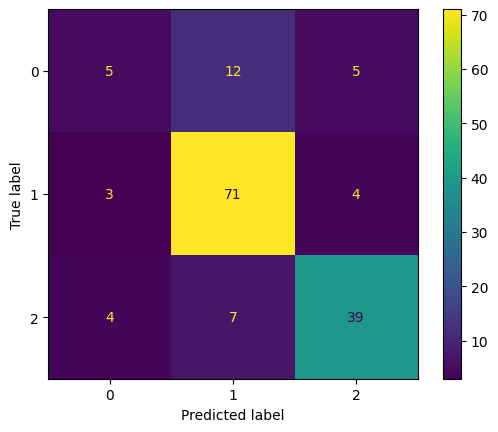

In [60]:
# Memvisualisasikan Confusion Matrix hasil prediksi model
viz_cm(y_test, y_test_pred)

Dari visualisasi terlihat ada jumlah predict yang tepat mendapat peningkatan

#### Balanced Data

In [61]:
# Tuning SVC menggunakan Balanced Data
TunedSVC_b = GridSearchCV(pipe_SVC_b, param_grid=grid_search_params, cv = 3)
TunedSVC_b.fit(X_train_balanced, y_train_balanced)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('Classifier',
                                        SVC(decision_function_shape='ovo',
                                            random_state=21))]),
             param_grid={'Classifier__C': [0.01, 0.05, 0.1, 1, 5, 10],
                         'Classifier__decision_function_shape': ['ovo'],
                         'Classifier__gamma': [0.01, 0.1, 'scale', 0.5],
                         'Classifier__kernel': ['rbf', 'poly', 'linear']})

In [62]:
# Menampilkan best parameter
print("Best Parameter :", TunedSVC_b.best_params_)
print('Best cross-validation accuracy : {:.2f}'.format(TunedSVC_b.best_score_))

Best Parameter : {'Classifier__C': 5, 'Classifier__decision_function_shape': 'ovo', 'Classifier__gamma': 0.1, 'Classifier__kernel': 'rbf'}
Best cross-validation accuracy : 0.84


Hasil Tuning menggunakan data yang telah dilakukan balancing

In [63]:
BestModelSVC_b = TunedSVC_b.best_estimator_

# Membuat variabel prediksi
y_train_pred = BestModelSVC_b.predict(X_train_balanced)
y_test_pred = BestModelSVC_b.predict(X_test_scaled)

# Check akurasi model
check_accuracy(y_train_balanced, y_test, y_train_pred, y_test_pred)

f1_score Train-set : 0.9719741345105134
f1_score Test-set : 0.7238798530168856


Proses prediksi model SVC dengan data yang Balance berhasil dan mendapat f1_score Train-set di 0.97 dan Test-set 0.72, model masih termasuk overfit

In [64]:
# Check Cross Validation menggunakan metrik F1_score
f1_cross_val(BestModelSVC_b, X_train_scaled, y_train)

F1 Score - All - Cross Validation  :  [0.8557033  0.73384404 0.72       0.70528139 0.74547875 0.80459123
 0.62445526 0.70454297 0.6991927  0.76470588]
F1 Score - Mean - Cross Validation :  0.7357795506818483
F1 Score - Std - Cross Validation  :  0.05994819124152483
F1 Score - Range of Test-Set       :  0.6758313594403235 - 0.7957277419233731


Nilai cross validation terlihat cukup ada peningkatan dari sebelumnya

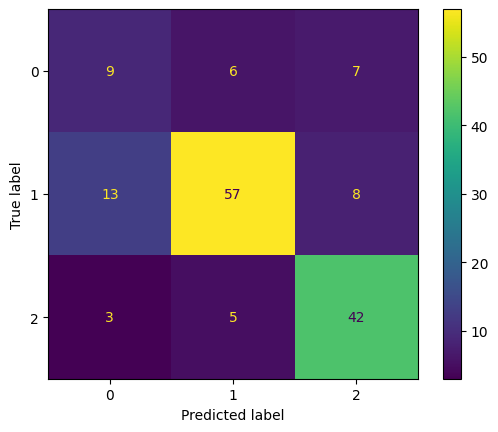

In [65]:
# Memvisualisasikan Confusion Matrix hasil prediksi model
viz_cm(y_test, y_test_pred)

Visualisasi confusion matrix pada tuning ini terlihat peningkatan dan penurnan dari tuning sebelumnya

## 8.2 - AdaBoostClassifier

In [66]:
# Membuat variabel prediksi
y_train_pred = ModelABC.predict(X_train)
y_test_pred = ModelABC.predict(X_test)

# Check akurasi model
check_accuracy(y_train, y_test, y_train_pred, y_test_pred)

f1_score Train-set : 0.6322055996509804
f1_score Test-set : 0.6721399938328707


Hasil prediksi mendapat akurasi f1_score Train-set 0.63 dan Test-set 0.67

In [67]:
f1_cross_val(ModelABC, X_train, y_train)

C:\Users\Asril\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Asril\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Asril\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Asril\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the S

F1 Score - All - Cross Validation  :  [0.66199134 0.57606178 0.60824176 0.58146718 0.58465608 0.54193548
 0.61118012 0.61061224 0.6042236  0.53885501]
F1 Score - Mean - Cross Validation :  0.5919224604780842
F1 Score - Std - Cross Validation  :  0.034316145228322485
F1 Score - Range of Test-Set       :  0.5576063152497617 - 0.6262386057064067


Nilai f1_score pada model ini sangat kurang

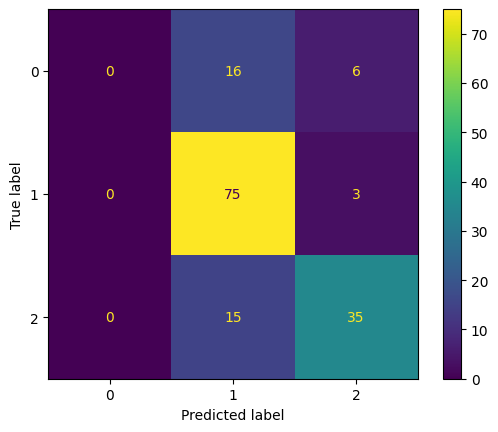

In [68]:
# Memvisualisasikan Confusion Matrix hasil prediksi model
viz_cm(y_test, y_test_pred)

Dari visualisasi confusion matrix terlihat miss predict total pada prediksi 0

### 8.2.1 - Hyperparameter Tuning

In [69]:
grid_search_params = {
    'Classifier__estimator__C':[0.01, 0.1, 1, 5, 10],
    'Classifier__estimator__kernel':['rbf','linear','poly'],
    'Classifier__estimator__gamma':[0.01, 0.1, 0.5, 'scale'],
    'Classifier__estimator__decision_function_shape':['ovo'],
    'Classifier__n_estimators':[10,50,100,500]
}

Parameter tuning yang akan digunakan

In [70]:
# Proses tuning
TunedABC = GridSearchCV(pipe_ABC, param_grid=grid_search_params, cv = 3)
TunedABC.fit(X_train, y_train)

C:\Users\Asril\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Asril\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Asril\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Asril\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the S

KeyboardInterrupt: 

In [ ]:
# Menampilkan best parameter
print("Best Parameter :", TunedABC.best_params_)
print('Best cross-validation accuracy : {:.2f}'.format(TunedABC.best_score_))

Best Parameter : {'Classifier__estimator__C': 0.01, 'Classifier__estimator__decision_function_shape': 'ovo', 'Classifier__estimator__gamma': 0.1, 'Classifier__estimator__kernel': 'rbf', 'Classifier__n_estimators': 10}
Best cross-validation accuracy : 0.74


Hasil tuning dengan parameter terbaik

In [ ]:
BestModelABC = TunedABC.best_estimator_

# Membuat variabel prediksi
y_train_pred = BestModelABC.predict(X_train)
y_test_pred = BestModelABC.predict(X_test)

# Check akurasi model
check_accuracy(y_train, y_test, y_train_pred, y_test_pred)

f1_score Train-set : 0.8316573898244208
f1_score Test-set : 0.7740394060767892


Hasil prediksi didapat f1_score Train-set 0.83 dan Test-set 0.77

In [ ]:
f1_cross_val(BestModelABC, X_train, y_train)

C:\Users\Asril\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Asril\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Asril\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Asril\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the S

F1 Score - All - Cross Validation  :  [0.8831342  0.62142857 0.62088229 0.70528139 0.7        0.64399093
 0.61486043 0.69585834 0.64015767 0.79441985]
F1 Score - Mean - Cross Validation :  0.6920013663337263
F1 Score - Std - Cross Validation  :  0.08261867577649117
F1 Score - Range of Test-Set       :  0.6093826905572352 - 0.7746200421102175


Walaupun akurasi prediksi f1_score tinggi, namun nilai Cross validation nya cukup rendah, kemungkinan banyak terjadi prediksi yang kebetulan

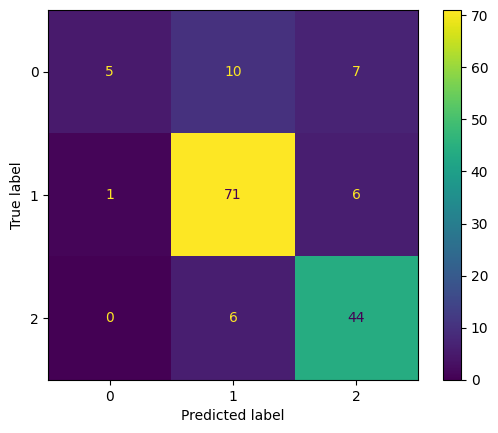

In [ ]:
# Memvisualisasikan Confusion Matrix hasil prediksi model
viz_cm(y_test, y_test_pred)

dari visualisasi terlihat prediksi 0 masih lebih rendah dari yg lain

## 8.3 - KNN Model

### Imbalance Data

In [71]:
# Membuat variabel prediksi
y_train_pred = ModelKNN.predict(X_train)
y_test_pred = ModelKNN.predict(X_test)

# Check akurasi model
check_accuracy(y_train, y_test, y_train_pred, y_test_pred)

f1_score Train-set : 0.7788208416438805
f1_score Test-set : 0.7481359183537403


Prediksi menggunakan model KNN didapat nilai f1_score Train-set 0.77 dan Test-set 0.74, nilai prediksi cukup bagus namun masih harus ditingkatkan

In [72]:
# Check cross validation score
f1_cross_val(ModelKNN, X_train, y_train)

F1 Score - All - Cross Validation  :  [0.79900154 0.70535714 0.56571429 0.67792208 0.61856972 0.66569917
 0.6295479  0.67026307 0.57028305 0.61404224]
F1 Score - Mean - Cross Validation :  0.6516400192787176
F1 Score - Std - Cross Validation  :  0.06544742748726382
F1 Score - Range of Test-Set       :  0.5861925917914538 - 0.7170874467659815


Terlihat hasil penghitungan cross validation memiliki nilai yang rendah

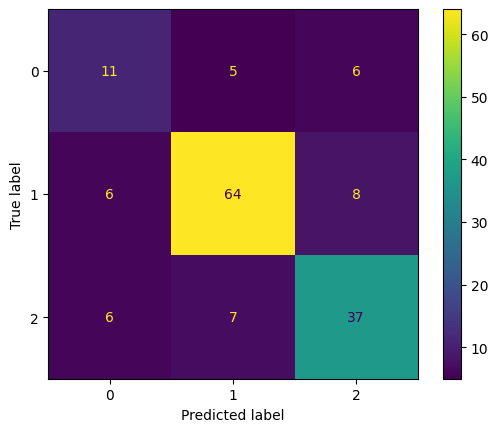

In [73]:
# Memvisualisasikan Confusion Matrix hasil prediksi model
viz_cm(y_test, y_test_pred)

Dari visualisasi terlihat bagus namun karena cross validation rendah, besar kemungkinan prediksi bagus secara kebetulan

### Balanced Data

In [74]:
# Membuat variabel prediksi dengan Balanced Data
y_train_pred = ModelKNN_b.predict(X_train_balanced)
y_test_pred = ModelKNN_b.predict(X_test_scaled)

# Check Akurasi model
check_accuracy(y_train_balanced, y_test, y_train_pred, y_test_pred)

f1_score Train-set : 0.8294119082791181
f1_score Test-set : 0.714257487152224


Hasil training dan predict menggunakan Balanced Data terlihat lebih baik namun masih overfit

In [75]:
# check cross validation score
f1_cross_val(ModelKNN_b, X_train_scaled, y_train)

F1 Score - All - Cross Validation  :  [0.79900154 0.70535714 0.56571429 0.67792208 0.61856972 0.66569917
 0.6295479  0.67026307 0.57028305 0.61404224]
F1 Score - Mean - Cross Validation :  0.6516400192787176
F1 Score - Std - Cross Validation  :  0.06544742748726382
F1 Score - Range of Test-Set       :  0.5861925917914538 - 0.7170874467659815


Hasil cross validation masih sama karena belum dilakukan tuning

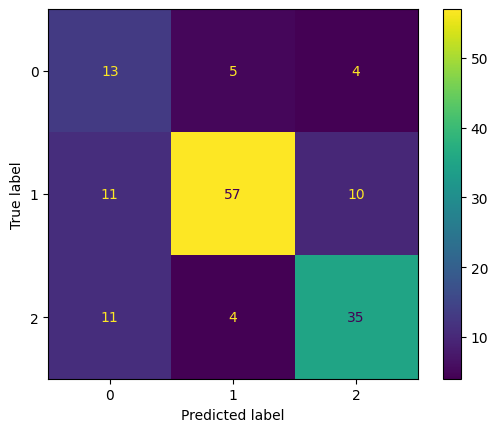

In [76]:
# Memvisualisasikan Confusion Matrix hasil prediksi model
viz_cm(y_test, y_test_pred)

### 8.3.1 - Hyperparameter Tuning

In [77]:
grid_search_params = {
    'Classifier__n_neighbors':[5,9,12,15,20,25,30,35],
    'Classifier__weights':['uniform','distance'],
    'Classifier__p':[1,2],
    'Classifier__algorithm':['ball_tree','kd_tree']
}

Parameter yang akan digunakan pada Tuning

#### Imbalanced Data

In [78]:
# Proses tuning
TunedKNN = GridSearchCV(pipe_KNN, param_grid=grid_search_params, cv = 3)
TunedKNN.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('Preprocessor',
                                        ColumnTransformer(transformers=[('pipe_num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'HomeSize',
                                                                          'MonthlyElectricityConsumption',
                                                                          'MonthlyWaterConsumption']),
                                                                        ('pipe_cat_nom',
                                                                         Pipeline(steps=[('encoder_nom',
                                                                                          OneHotEncoder())]),
                                                                         ['Location',
                                                                          'DietType',
                                                                          'TransportationMode',
                                                                          'EnergySourc...
                                                                                                                      'Sometimes',
                                                                                                                      'Often'],
                                                                                                                     [1,
                                                                                                                      2,
                                                                                                                      3,
                                                                                                                      4,
                                                                                                                      5]]))]),
                                                                         ['LocalFoodFrequency',
                                                                          'ClothingFrequency',
                                                                          'UsingPlasticProducts',
                                                                          'EnvironmentalAwareness'])])),
                                       ('Classifier', KNeighborsClassifier())]),
             param_grid={'Classifier__algorithm': ['ball_tree', 'kd_tree'],
                         'Classifier__n_neighbors': [5, 9, 12, 15, 20, 25, 30,
                                                     35],
                         'Classifier__p': [1, 2],
                         'Classifier__weights': ['uniform', 'distance']})

Proses Tuning berhasil dilakukan

In [79]:
# Menampilkan best parameter
print("Best Parameter :", TunedKNN.best_params_)
print('Best cross-validation accuracy : {:.2f}'.format(TunedKNN.best_score_))

Best Parameter : {'Classifier__algorithm': 'ball_tree', 'Classifier__n_neighbors': 30, 'Classifier__p': 1, 'Classifier__weights': 'distance'}
Best cross-validation accuracy : 0.74


Hasil tuning didapat best parameter dan akurasi cross validation cukup bagus

In [80]:
# Mengambil best estimator
BestModelKNN = TunedKNN.best_estimator_

# Membuat variabel prediksi
y_train_pred = BestModelKNN.predict(X_train)
y_test_pred = BestModelKNN.predict(X_test)

# Check akurasi model
check_accuracy(y_train, y_test, y_train_pred, y_test_pred)

f1_score Train-set : 1.0
f1_score Test-set : 0.7233580770590314


Prediksi dengan best parameter menghasilkan nilai f1_score pada Train-set 1.0 dan Test-set 0.72, nilai ini masih mengindikasikan bahwa model masih overfit

In [81]:
# Check cross validation score
f1_cross_val(BestModelKNN, X_train, y_train)

F1 Score - All - Cross Validation  :  [0.85699497 0.70535714 0.61626944 0.76047736 0.75500928 0.744553
 0.65472813 0.74525955 0.61587302 0.69936553]
F1 Score - Mean - Cross Validation :  0.7153887414219182
F1 Score - Std - Cross Validation  :  0.07011634202816681
F1 Score - Range of Test-Set       :  0.6452723993937514 - 0.7855050834500851


Namun untuk nilai Cross Validation terdapat peningkatan, walaupun tetap rendah

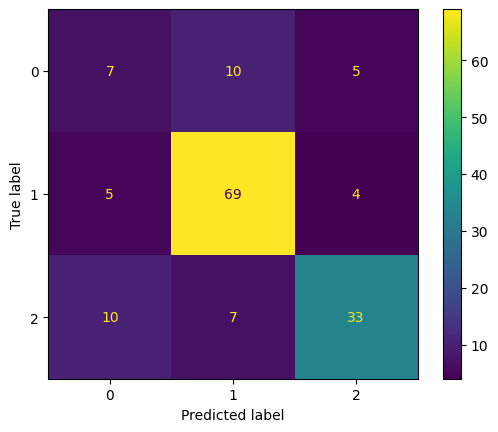

In [82]:
# Memvisualisasikan Confusion Matrix hasil prediksi model
viz_cm(y_test, y_test_pred)

#### Balanced Data

In [83]:
# Proses tuning untuk data Balance
TunedKNN_b = GridSearchCV(pipe_KNN_b, param_grid=grid_search_params, cv = 3)
TunedKNN_b.fit(X_train_balanced, y_train_balanced)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('Classifier', KNeighborsClassifier())]),
             param_grid={'Classifier__algorithm': ['ball_tree', 'kd_tree'],
                         'Classifier__n_neighbors': [5, 9, 12, 15, 20, 25, 30,
                                                     35],
                         'Classifier__p': [1, 2],
                         'Classifier__weights': ['uniform', 'distance']})

Proses tuning berhasil dilakukan

In [84]:
# Menampilkan best parameter
print("Best Parameter :", TunedKNN_b.best_params_)
print('Best cross-validation accuracy : {:.2f}'.format(TunedKNN_b.best_score_))

Best Parameter : {'Classifier__algorithm': 'ball_tree', 'Classifier__n_neighbors': 9, 'Classifier__p': 1, 'Classifier__weights': 'distance'}
Best cross-validation accuracy : 0.81


Hasil tuning didapat parameter terbaik dan nilai cross validation yang cukup besar

In [85]:
# Mengambil best estimator
BestModelKNN_b = TunedKNN_b.best_estimator_

# Membuat variabel prediksi
y_train_pred = BestModelKNN_b.predict(X_train_balanced)
y_test_pred = BestModelKNN_b.predict(X_test_scaled)

# Check akurasi model
check_accuracy(y_train_balanced, y_test, y_train_pred, y_test_pred)

f1_score Train-set : 1.0
f1_score Test-set : 0.7336812030075189


Hasil prediksi didapat akurasi f1_score pada Train-set 1.0 dan Test-set 0.73, terdapat peningkatan pada test-set namun model masih overfit

In [86]:
# Check cross validation score
f1_cross_val(BestModelKNN_b, X_train_scaled, y_train)

F1 Score - All - Cross Validation  :  [0.8297687  0.70535714 0.67842388 0.79673828 0.73886854 0.7182266
 0.61979587 0.67389499 0.72750708 0.7039819 ]
F1 Score - Mean - Cross Validation :  0.7192562982368409
F1 Score - Std - Cross Validation  :  0.057196179793255864
F1 Score - Range of Test-Set       :  0.662060118443585 - 0.7764524780300968


nilai cross validation tidak ada peningkatan

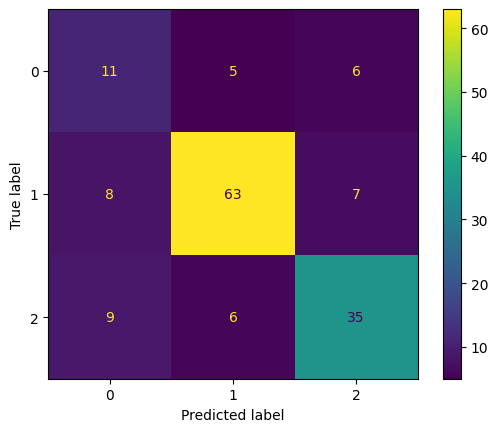

In [87]:
# Memvisualisasikan Confusion Matrix hasil prediksi model
viz_cm(y_test, y_test_pred)

## 8.4 - DecisionTree Classifier Model

### Imbalance Data

In [88]:
# Membuat variabel prediksi
y_train_pred = ModelDT.predict(X_train)
y_test_pred = ModelDT.predict(X_test)

# Check akurasi model
check_accuracy(y_train, y_test, y_train_pred, y_test_pred)

f1_score Train-set : 1.0
f1_score Test-set : 0.6892634327371356


Hasil prediksi pada model DecisionTree didapat akurasi f1_score pada Train-set 1.0 dan Test-set 0.69, model masih overfit

In [89]:
# Check Cross validation score
f1_cross_val(ModelDT, X_train, y_train)

F1 Score - All - Cross Validation  :  [0.79717674 0.61594638 0.62502659 0.71274962 0.76857957 0.65070644
 0.59917184 0.65257143 0.724158   0.70343137]
F1 Score - Mean - Cross Validation :  0.6849517970079769
F1 Score - Std - Cross Validation  :  0.06338106461204547
F1 Score - Range of Test-Set       :  0.6215707323959314 - 0.7483328616200224


Pada hasil test cross validation didapat score yang masih sangat rendah

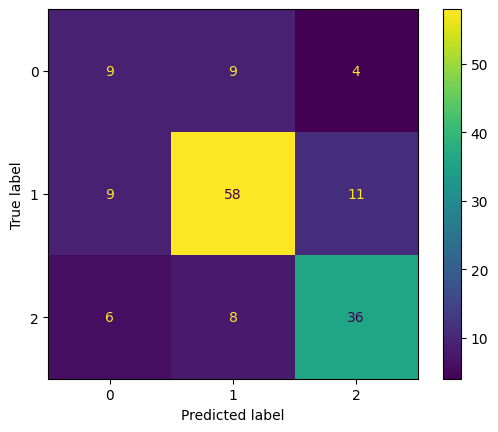

In [90]:
# Memvisualisasikan Confusion Matrix hasil prediksi model
viz_cm(y_test, y_test_pred)

### Balanced Data

In [91]:
# Membuat variabel prediksi
y_train_pred = ModelDT_b.predict(X_train_balanced)
y_test_pred = ModelDT_b.predict(X_test_scaled)

# Check akurasi model
check_accuracy(y_train_balanced, y_test, y_train_pred, y_test_pred)

f1_score Train-set : 1.0
f1_score Test-set : 0.7096108208554527


Hasil prediksi model DecisionTree dengan Balanced Data didapat akurasi yang sedikit lebih baik dibanding dengan imbalanced data

In [92]:
# Check Cross validation score
f1_cross_val(ModelDT_b, X_train_scaled, y_train)

F1 Score - All - Cross Validation  :  [0.79717674 0.61594638 0.62502659 0.71274962 0.76857957 0.65070644
 0.59917184 0.65257143 0.724158   0.70343137]
F1 Score - Mean - Cross Validation :  0.6849517970079769
F1 Score - Std - Cross Validation  :  0.06338106461204547
F1 Score - Range of Test-Set       :  0.6215707323959314 - 0.7483328616200224


Untuk nilai cross validationnya masih sama karena tidak ada pengubahan dalam model maupun parameter

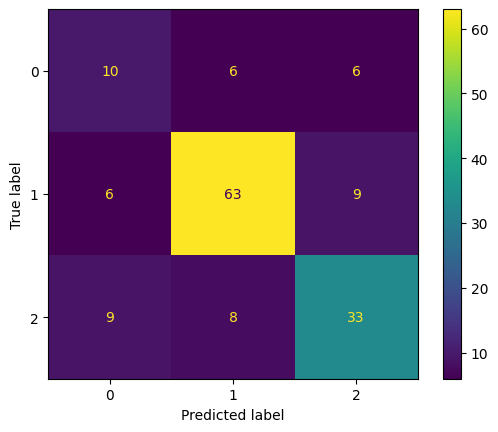

In [93]:
# Memvisualisasikan Confusion Matrix hasil prediksi model
viz_cm(y_test, y_test_pred)

### 8.4.1 - Hyperparameter Tuning

In [94]:
grid_search_params = {
    'Classifier__criterion':['gini','entropy','log_loss'],
    'Classifier__max_depth':[1,2,3,4,5],
    'Classifier__min_samples_split':[2,10,35,40,50],
    'Classifier__min_samples_leaf':[1,2,10,25,30,35],
    'Classifier__max_leaf_nodes':[2,3,4,5]
}

Parameter yang akan dipakai tuning model DecisionTree

#### Imbalance Data

In [95]:
# Proses Tuning
TunedDT = GridSearchCV(pipe_DT, param_grid=grid_search_params, cv = 3)
TunedDT.fit(X_train, y_train)

KeyboardInterrupt: 

Proses Tuning berhasil dilakukan

In [ ]:
# Menampilkan best parameter
print("Best Parameter :", TunedDT.best_params_)
print('Best cross-validation accuracy : {:.2f}'.format(TunedDT.best_score_))

Best Parameter : {'Classifier__criterion': 'entropy', 'Classifier__max_depth': 3, 'Classifier__max_leaf_nodes': 5, 'Classifier__min_samples_leaf': 25, 'Classifier__min_samples_split': 2}
Best cross-validation accuracy : 0.70


Hasil tuning didapat parameter terbaik dengan nilai cross validation 

In [ ]:
BestModelDT = TunedDT.best_estimator_

# Membuat variabel prediksi
y_train_pred = BestModelDT.predict(X_train)
y_test_pred = BestModelDT.predict(X_test)

# Check akurasi model
check_accuracy(y_train, y_test, y_train_pred, y_test_pred)

f1_score Train-set : 0.7089276207826568
f1_score Test-set : 0.6843864182419874


Prediksi model DecisionTree menghasilkan nilai akurasi f1_score Train-set 0.70 dan Test-set 0.68, model ini masih harus ditingkatkan kembali

In [ ]:
# Check cross validation score
f1_cross_val(BestModelDT, X_train, y_train)

F1 Score - All - Cross Validation  :  [0.73038479 0.6312671  0.63788592 0.68638029 0.67133583 0.62716484
 0.5124109  0.74938776 0.53708817 0.62198042]
F1 Score - Mean - Cross Validation :  0.6405286004037781
F1 Score - Std - Cross Validation  :  0.07120769875712436
F1 Score - Range of Test-Set       :  0.5693209016466537 - 0.7117362991609025


Pada pengecekan cross validation score terlihat nilai cross validation yang rendah

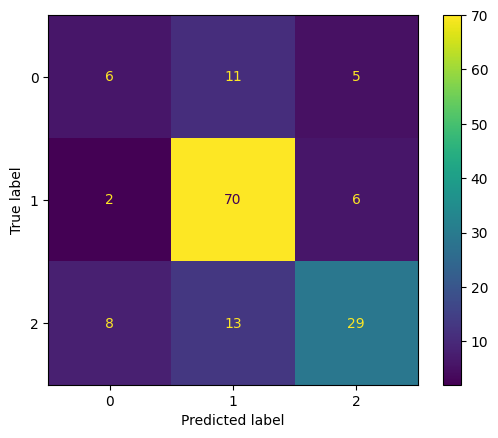

In [ ]:
# Memvisualisasikan Confusion Matrix hasil prediksi model
viz_cm(y_test, y_test_pred)

#### Balanced Data

In [ ]:
# Proses tuning model dengan Balanced Data
TunedDT_b = GridSearchCV(pipe_DT_b, param_grid=grid_search_params, cv = 3)
TunedDT_b.fit(X_train_balanced, y_train_balanced)

C:\Users\Asril\AppData\Roaming\Python\Python39\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('Classifier',
                                        DecisionTreeClassifier(random_state=21))]),
             param_grid={'Classifier__criterion': ['gini', 'entropy',
                                                   'log_loss'],
                         'Classifier__max_depth': [1, 2, 3, 4, 5],
                         'Classifier__max_leaf_nodes': [2, 3, 4, 5],
                         'Classifier__min_samples_leaf': [1, 2, 10, 25, 30, 35],
                         'Classifier__min_samples_split': [2, 10, 35, 40, 50]})

In [ ]:
# Menampilkan best parameter
print("Best Parameter :", TunedDT_b.best_params_)
print('Best cross-validation accuracy : {:.2f}'.format(TunedDT_b.best_score_))

Best Parameter : {'Classifier__criterion': 'entropy', 'Classifier__max_depth': 4, 'Classifier__max_leaf_nodes': 5, 'Classifier__min_samples_leaf': 25, 'Classifier__min_samples_split': 2}
Best cross-validation accuracy : 0.69


Hasil Tuning dengan balanced data berhasil

In [ ]:
# Mengambil best estimator
BestModelDT_b = TunedDT_b.best_estimator_

# Membuat variabel prediksi
y_train_pred = BestModelDT_b.predict(X_train_balanced)
y_test_pred = BestModelDT_b.predict(X_test_scaled)

# Check akurasi model
check_accuracy(y_train_balanced, y_test, y_train_pred, y_test_pred)

f1_score Train-set : 0.7385808375198295
f1_score Test-set : 0.6674391084093212


Namun hasil tuning masih kurang memuaskan, bahkan tidak terdapat kenaikan daripada parameter default

In [ ]:
# Check cross validation score
f1_cross_val(BestModelDT_b, X_train_balanced, y_train_balanced)

F1 Score - All - Cross Validation  :  [0.80866316 0.66241788 0.69692347 0.54901592 0.73406947 0.58557938
 0.7609162  0.68243819 0.77892977 0.80424074]
F1 Score - Mean - Cross Validation :  0.7063194178342123
F1 Score - Std - Cross Validation  :  0.08425820442942997
F1 Score - Range of Test-Set       :  0.6220612134047823 - 0.7905776222636423


Nilai cross validationnya juga masih kurang bagus

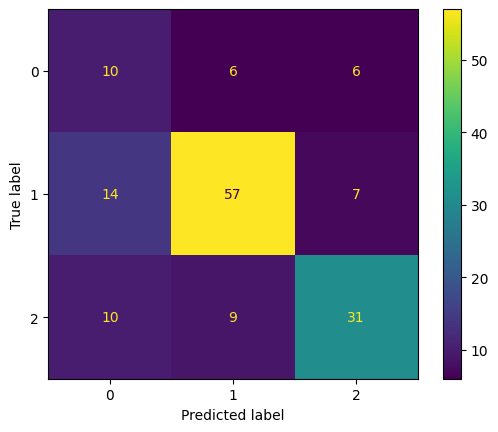

In [ ]:
# Memvisualisasikan Confusion Matrix hasil prediksi model
viz_cm(y_test, y_test_pred)

## 8.5 - RandomForest Classifier

### Imbalance Data

In [96]:
# Membuat variabel prediksi
y_train_pred = ModelRF.predict(X_train)
y_test_pred = ModelRF.predict(X_test)

# Check akurasi Model
check_accuracy(y_train, y_test, y_train_pred, y_test_pred)

f1_score Train-set : 1.0
f1_score Test-set : 0.7553575498575499


Hasil prediksi dengan model Random Forest didapat akurasi yang cukup bagus, tetapi masih bisa disempurnakan dengan Tuning

In [97]:
# Check Cross validation score
f1_cross_val(ModelRF, X_train, y_train)

F1 Score - All - Cross Validation  :  [0.85543346 0.80036269 0.76791261 0.73051948 0.78628187 0.68553114
 0.64280309 0.72428571 0.71668812 0.70588235]
F1 Score - Mean - Cross Validation :  0.7415700515053634
F1 Score - Std - Cross Validation  :  0.058586163185533016
F1 Score - Range of Test-Set       :  0.6829838883198304 - 0.8001562146908964


Begitupun dengan nilai cross validationnya, cukup tinggi dibanding dengan model lainnya

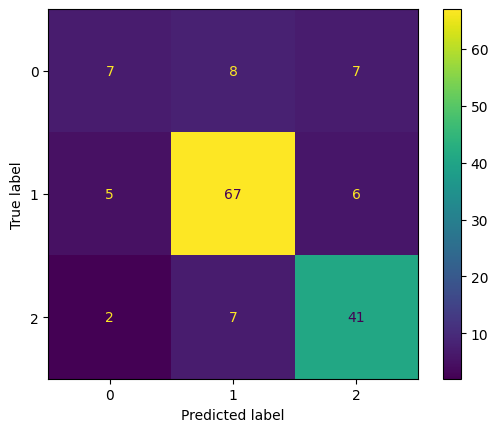

In [98]:
# Memvisualisasikan Confusion Matrix hasil prediksi model
viz_cm(y_test, y_test_pred)

### Balanced Data

In [99]:
# Membuat variabel prediksi
y_train_pred = ModelRF_b.predict(X_train_balanced)
y_test_pred = ModelRF_b.predict(X_test_scaled)

# Check akurasi Model
check_accuracy(y_train_balanced, y_test, y_train_pred, y_test_pred)

f1_score Train-set : 1.0
f1_score Test-set : 0.7458796836384789


Hasil prediksi dengan balanced data juga menunjukan akurasi yang hampir sama

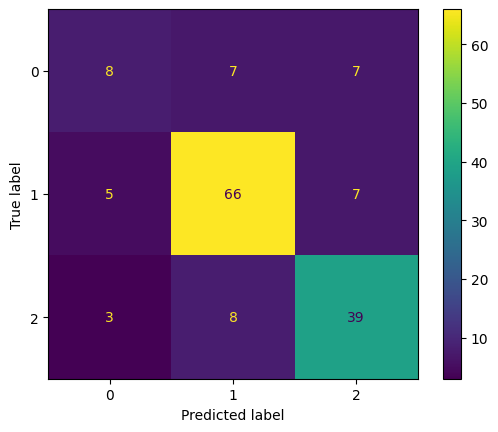

In [100]:
# Memvisualisasikan Confusion Matrix hasil prediksi model
viz_cm(y_test, y_test_pred)

### 8.5.1 - Hyperparameter Tuning

In [101]:
grid_search_params = {
    'Classifier__n_estimators':[37,38,39,40,50],
    'Classifier__max_depth':[None,2,5,10],
    'Classifier__min_samples_leaf':[1,5,15,20],
    'Classifier__max_leaf_nodes':[None,2,5,10],
    'Classifier__min_samples_split':[2,4,8,10]
}

#### Imbalance Data

In [102]:
TunedRF = GridSearchCV(pipe_RF, param_grid=grid_search_params, cv =3)
TunedRF.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('Preprocessor',
                                        ColumnTransformer(transformers=[('pipe_num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'HomeSize',
                                                                          'MonthlyElectricityConsumption',
                                                                          'MonthlyWaterConsumption']),
                                                                        ('pipe_cat_nom',
                                                                         Pipeline(steps=[('encoder_nom',
                                                                                          OneHotEncoder())]),
                                                                         ['Location',
                                                                          'DietType',
                                                                          'TransportationMode',
                                                                          'EnergySourc...
                                                                          'ClothingFrequency',
                                                                          'UsingPlasticProducts',
                                                                          'EnvironmentalAwareness'])])),
                                       ('Classifier',
                                        RandomForestClassifier(random_state=21))]),
             param_grid={'Classifier__max_depth': [None, 2, 5, 10],
                         'Classifier__max_leaf_nodes': [None, 2, 5, 10],
                         'Classifier__min_samples_leaf': [1, 5, 15, 20],
                         'Classifier__min_samples_split': [2, 4, 8, 10],
                         'Classifier__n_estimators': [37, 38, 39, 40, 50]})

'Classifier__max_depth': None, 'Classifier__max_leaf_nodes': None, 'Classifier__min_samples_leaf': 1, 'Classifier__min_samples_split': 2, 'Classifier__n_estimators': 37

In [103]:
# Menampilkan best parameter
print("Best Parameter :", TunedRF.best_params_)
print('Best cross-validation accuracy : {:.2f}'.format(TunedRF.best_score_))

Best Parameter : {'Classifier__max_depth': None, 'Classifier__max_leaf_nodes': None, 'Classifier__min_samples_leaf': 1, 'Classifier__min_samples_split': 2, 'Classifier__n_estimators': 37}
Best cross-validation accuracy : 0.77


Proses tuning berhasil dan didapat parameter dan nilai cross validation di angka 0.77

In [104]:
# Mengambil best estimator
BestModelRF = TunedRF.best_estimator_

# Membuat variabel prediksi
y_train_pred = BestModelRF.predict(X_train)
y_test_pred = BestModelRF.predict(X_test)

# Check akurasi model hasil tuning
check_accuracy(y_train, y_test, y_train_pred, y_test_pred)

f1_score Train-set : 0.9971403107673554
f1_score Test-set : 0.7524521206811977


Hasil prediksi cukup juga terlihat cukup bagus

In [105]:
# Check cross validation score
f1_cross_val(BestModelRF, X_train, y_train)

F1 Score - All - Cross Validation  :  [0.82769568 0.80136054 0.69279461 0.81420408 0.78683673 0.68571429
 0.71869388 0.72941662 0.71668812 0.73555706]
F1 Score - Mean - Cross Validation :  0.7508961602466963
F1 Score - Std - Cross Validation  :  0.049267372793409814
F1 Score - Range of Test-Set       :  0.7016287874532865 - 0.800163533040106


Nilai Cross validation didapat 0.75 dan cukup bagus

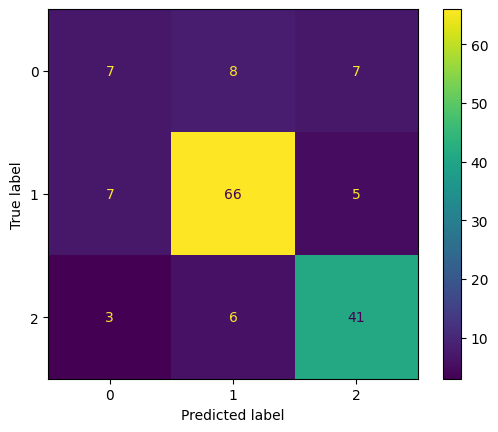

In [106]:
# Memvisualisasikan Confusion Matrix hasil prediksi model
viz_cm(y_test, y_test_pred)

#### Balanced Data

In [107]:
# Proses tuning model dengan Balanced Data
TunedRF_b = GridSearchCV(pipe_RF_b, param_grid=grid_search_params, cv = 3)
TunedRF_b.fit(X_train_balanced, y_train_balanced)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('Classifier',
                                        RandomForestClassifier(random_state=21))]),
             param_grid={'Classifier__max_depth': [None, 2, 5, 10],
                         'Classifier__max_leaf_nodes': [None, 2, 5, 10],
                         'Classifier__min_samples_leaf': [1, 5, 15, 20],
                         'Classifier__min_samples_split': [2, 4, 8, 10],
                         'Classifier__n_estimators': [37, 38, 39, 40, 50]})

In [108]:
# Menampilkan best parameter
print("Best Parameter :", TunedRF_b.best_params_)
print('Best cross-validation accuracy : {:.2f}'.format(TunedRF_b.best_score_))

Best Parameter : {'Classifier__max_depth': None, 'Classifier__max_leaf_nodes': None, 'Classifier__min_samples_leaf': 1, 'Classifier__min_samples_split': 2, 'Classifier__n_estimators': 50}
Best cross-validation accuracy : 0.84


Proses tuning dengan balanced data berhasil

In [109]:
# Mengambil best estimator
BestModelRF_b = TunedRF_b.best_estimator_

# Membuat variabel prediksi
y_train_pred = BestModelRF_b.predict(X_train_scaled)
y_test_pred = BestModelRF_b.predict(X_test_scaled)

# Check akurasi model
check_accuracy(y_train, y_test, y_train_pred, y_test_pred)

f1_score Train-set : 1.0
f1_score Test-set : 0.7711713883865782


Hasil prediksi terdapat peningkatan dari sebelumnya

In [110]:
# Check cross validation score
f1_cross_val(BestModelRF_b, X_train_scaled, y_train)

F1 Score - All - Cross Validation  :  [0.82769568 0.82873563 0.66487395 0.7372549  0.81448594 0.71129252
 0.64752137 0.69585834 0.69269841 0.70798877]
F1 Score - Mean - Cross Validation :  0.7328405502813202
F1 Score - Std - Cross Validation  :  0.0639051193285271
F1 Score - Range of Test-Set       :  0.6689354309527931 - 0.7967456696098474


Namun pada nilai cross validationnya tidak mengalami kenaikan

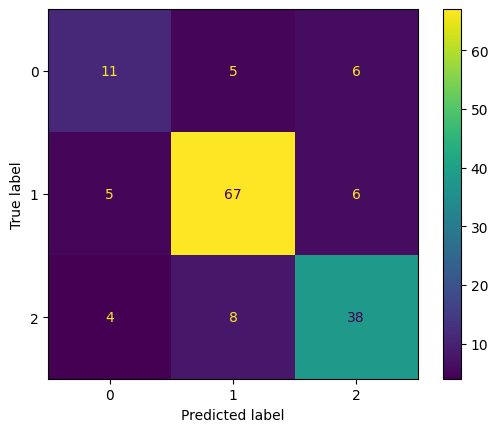

In [111]:
# Memvisualisasikan Confusion Matrix hasil prediksi model
viz_cm(y_test, y_test_pred)

# 9 - Model Saving

Setelah dilakukan evaluasi 5 model dengan berbagai jenis data (Imbalanced Data dan Balanced) dan Tuning yang telah dilakukan saya dapat menentukan model terbaik untuk objective yang ingin saya capai.

Model terbaik yang akan saya gunakan yaitu Random Forest dengan parameter `n_estimators` = 37 dari hasil hyperparameter tuning. Keputusan ini diambil dari nilai cross-validation terbesar dan metriks pada test-set yang cukup bagus

In [112]:
# Menyimpan model terbaik yang telah dibuat
with open("best_model.pkl", "wb") as file_1:
   pickle.dump(BestModelRF, file_1)

Menyimpan model terbaik ke dalam file pickle `best_model.pkl`

# 10 - Kesimpulan

Dari berbagai hal yang dilakukan diatas, saya dapat menarik beberapa kesimpulan untuk model machine learning kali ini yaitu :

- Penyederhanaan Value `Rating` memiliki efek yang signifikan, hal ini karena total data pada dataset sangat terbatas untuk melatih machine learning maupun test nya.
- Proses Data Balancing sebenarnya sangat membantu untuk menaikkan jumlah data dengan oversampling namun terkendala penggunaan Pipeline yang tidak bisa secara mudah digabungkan dengan Pipeline preprocessing karena harus melewati proses SMOTE dahulu.
- Setiap Model terdapat 2x training menggunakan Imbalance Data dan Balanced Data. Hal ini saya buat karena ingin mengetahui efek dari Balancing Data terhadap hasil training model tersebut.
- Hyperparameter Tuning dilakukan berkali-kali dengan cara menyesuaikan parameter dengan hasil best parameter yang telah dicari hingga parameter terbaik tidak berubah kembali.
- Model terbaik untuk dataset ini adalah RandomForest Classifier dengan parameter `n_estimators` = 37, dibuktikan dengan nilai cross-validation dan akurasi yang lebih bagus dari keempat model lain.

Adapun hal yang perlu menjadi catatan untuk mengembangkan model dari notebook ini yaitu :

- Menambah berbagai macam Parameter pada proses Tuning agar model yang dihasilkan lebih baik lagi
- Data Balancing pada Notebook ini hanya menggunakan oversampling not majority, mungkin akan lebih baik jika Balancing menggunakan metode lain dengan sampling_strategy yang lebih cocok
- Pada notebook ini hanya dilakukan model ensemble boosting, mungkin akan lebih baik jika menggunakan lebih banyak ensemble learning yang beragam

# 11 - Conceptual Problems

## 11.1 - Jelaskan latar belakang adanya bagging dan cara kerja bagging !

Metode Bagging dibuat untuk mengatasi variasi dan overfitting dalam berbagai model machine learning. Cara kerja Bagging yaitu dengan mengambil dataset secara acak untuk dilakukan training lalu mengulangi proses tersebut sebanyak 10x atau lebih sesuai dengan n_estimators yang diinput, kemudian hasil prediksi setiap prosesnya akan dilakukan voting untuk klasifikasi dan Rata-rata untuk regresi

## 11.2 - Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang anda pilih !

Cara kerja Random Forest yaitu dengan mengumpulkan hasil dari beberapa DecisionTree lalu membuat prediksi untuk setiap DecisionTree yang telah dikumpulkan, selanjutnya hasil akhir akan diambil berdasarkan voting atau rata-rata.

Sedangkan untuk AdaBoostClassifier bekerja dengan mengulang proses training weak classifier dengan cara memberi bobot berdasarkan performa pada training sebelumnya, proses ini berlanjut hingga iterasi yang telah ditentukan sebelumnya, hasil akhir diambil dari rata-rata weighted dari semua weak classifier

## 11.3 - Jelaskan apa yang dimaksud dengan Cross Validation !

Cross Validation merupakan fungsi untuk menghitung persentase hasil prediksi model yang kebetulan/tidak konsisten. Cross Validation dapat menjadi acuan seberapa bagus model yang kita buat untuk memprediksi input data baru